<a href="https://colab.research.google.com/github/Quanglinhdzdellchiudc22/Gaussian/blob/main/Gausian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/time_series/ecg_sample_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


Mean (μ): -0.0017
Std Dev (σ): 1.0614
Số lượng điểm bất thường phát hiện: 0


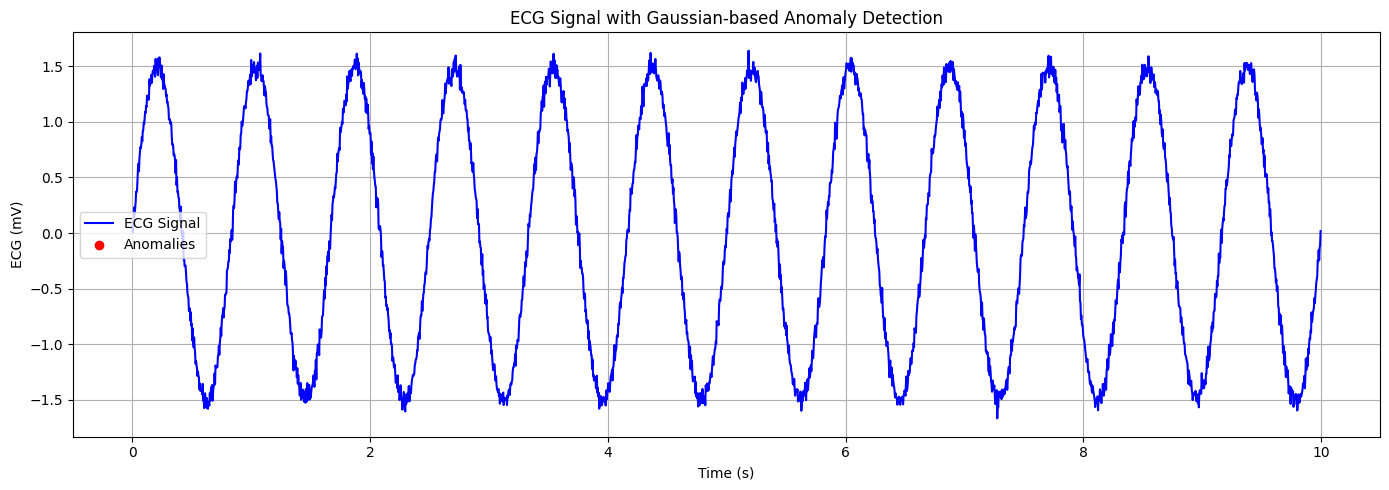

In [4]:
# Bước 2: Trích xuất tín hiệu ECG
ecg_values = df["ECG (mV)"].values
time_values = df["Time (s)"].values

# Import the necessary function from scipy.stats
from scipy.stats import norm

# Bước 3: Tính toán trung bình và độ lệch chuẩn
mu = np.mean(ecg_values)
sigma = np.std(ecg_values)

# Bước 4: Tính xác suất phân phối chuẩn cho mỗi điểm
probabilities = norm.pdf(ecg_values, mu, sigma)

# Bước 5: Phát hiện điểm bất thường (outside μ ± 3σ)
anomalies = (ecg_values < mu - 3 * sigma) | (ecg_values > mu + 3 * sigma)

# Bước 6: Hiển thị thông tin
print(f"Mean (μ): {mu:.4f}")
print(f"Std Dev (σ): {sigma:.4f}")
print(f"Số lượng điểm bất thường phát hiện: {np.sum(anomalies)}")

# Bước 7: Trực quan hóa kết quả
plt.figure(figsize=(14, 5))
plt.plot(time_values, ecg_values, label="ECG Signal", color='blue')
plt.scatter(time_values[anomalies], ecg_values[anomalies], color='red', label='Anomalies', zorder=5)
plt.title("ECG Signal with Gaussian-based Anomaly Detection")
plt.xlabel("Time (s)")
plt.ylabel("ECG (mV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
ecg = df["ECG (mV)"].values
time = df["Time (s)"].values

# Kalman Filter đơn giản
def kalman_filter(z, Q=1e-5, R=0.01**2):
    n = len(z)
    x_hat = np.zeros(n)       # Ước lượng
    P = np.zeros(n)           # Sai số ước lượng
    x_hat[0] = z[0]
    P[0] = 1.0

    for k in range(1, n):
        # Dự đoán
        x_hat_minus = x_hat[k-1]
        P_minus = P[k-1] + Q

        # Cập nhật
        K = P_minus / (P_minus + R)
        x_hat[k] = x_hat_minus + K * (z[k] - x_hat_minus)
        P[k] = (1 - K) * P_minus

    return x_hat

# Áp dụng Kalman Filter
ecg_filtered = kalman_filter(ecg)

# Gaussian Model (trên tín hiệu đã lọc)
mu = np.mean(ecg_filtered)
sigma = np.std(ecg_filtered)

# Phát hiện bất thườngS
threshold = 3
anomalies = (ecg_filtered < mu - threshold * sigma) | (ecg_filtered > mu + threshold * sigma)



# In thông tin
print(f"Mean (μ): {mu:.4f}, Std Dev (σ): {sigma:.4f}")
print(f"Số điểm bất thường: {np.sum(anomalies)}")

# Vẽ biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(time, ecg, label="Raw ECG", alpha=0.5)
plt.plot(time, ecg_filtered, label="Filtered ECG (Kalman)", linewidth=2)
plt.scatter(time[anomalies], ecg_filtered[anomalies], color='red', label="Anomalies", zorder=5)
plt.title("ECG Signal - Kalman Filter + Gaussian Anomaly Detection")
plt.xlabel("Time (s)")
plt.ylabel("ECG (mV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [1]:
accuracy = accuracy_score(labels, anomalies)
precision = precision_score(labels, anomalies)
recall = recall_score(labels, anomalies)
f1 = f1_score(labels, anomalies)
conf_matrix = confusion_matrix(labels, anomalies)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

NameError: name 'accuracy_score' is not defined